## Observations and Insights 

# Import Files

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Establish data file paths
mouse_metadata_path = os.path.join("..", "Resources", "Mouse_metadata.csv")
study_results_path = os.path.join("..", "Resources", "Study_results.csv")

# Read the mouse data and the study results as df's
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Mouse Metadata File

In [2]:
# View mouse metadata df
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Understand df structure - count rows in table
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
# Understand df structure - count unique mouse ID values
len(pd.unique(mouse_metadata["Mouse ID"]))

# df contains one row per mouse - total of 249 mice in study

249

# Study Results File

In [5]:
# View study results df
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Understand df structure - count rows in table
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Understand df structure - count unique mouse ID and timepoint values
len(pd.unique(study_results["Mouse ID"]))
len(pd.unique(study_results["Timepoint"]))

# df contains multiple rows per mouse, 10 unique timepoint values

10

In [8]:
# List the unique timepoints
study_results["Timepoint"].unique()

# Data is recorded for the mice every 5 days

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

## Clean Study Results File

In [9]:
# Remove mice with duplicate timepoints
# Create a new df sorted by mouse ID, then timepoint
sort_study_results = study_results.sort_values(by=['Mouse ID', 'Timepoint'], ascending=[True, True])

# Preview sorted df to ensure sorting worked as expected
sort_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
598,a203,10,51.852437,1
758,a203,15,52.777870,1
1018,a203,20,55.173336,1


In [10]:
# Create empty list to hold mouse IDs that have duplicate timepoints
drop_rows = []

# Loop through sorted df to pull mouse IDs into list for which duplicate timepoints exist
for x in range(0, len(sort_study_results)):
    if (sort_study_results.iloc[x, 0] == sort_study_results.iloc[x-1, 0]) & (sort_study_results.iloc[x, 1] == sort_study_results.iloc[x-1, 1]):
        drop_rows.append(sort_study_results.iloc[x, 0])

# Print list to see list of mouse IDs with duplicate timepoints
drop_rows

['g989', 'g989', 'g989', 'g989', 'g989']

In [11]:
# Create a new list with only unique mouse IDs from the drop list
unique_drop_rows_set = set(drop_rows)
unique_drop_rows = (list(unique_drop_rows_set))
unique_drop_rows

['g989']

In [12]:
# Drop rows for any mouse ID contained in the drop list
for value in unique_drop_rows:
    study_results.drop(study_results[study_results['Mouse ID'] == value].index, inplace = True)

# Print clean df
study_results.count()

# df appears to either contain 188 mice with full timepoint data or more mice (up to 248) with incomplete timepoint data

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

# Create Combined Dataframe

In [13]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [14]:
# Verify number of rows in merged df equals that in study results df
merge_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [15]:
# Check number of mice in merged df
len(pd.unique(merge_df["Mouse ID"]))

248

# Summary Statistics for Tumor Volume

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (groupby)
regimen_mean = merge_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
regimen_median = merge_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
regimen_var = merge_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
regimen_std = merge_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
regimen_sem = merge_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

summary_tumor_df = pd.DataFrame({"Average Tumor Volume (mm3)": regimen_mean,
                                  "Median Tumor Volume (mm3)": regimen_median,
                                  "Variance of Tumor Volume (mm3)": regimen_var,
                                  "Standard Dev of Tumor Volume (mm3)": regimen_std,
                                  "Standard Error of the Mean of Tumor Volume (mm3)": regimen_sem})

# Display summary table
summary_tumor_df

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Dev of Tumor Volume (mm3),Standard Error of the Mean of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


# Bar and Pie Charts

## Measurement Count by Drug Regimen

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create a count series for each regimen
regimen_measure_count = merge_df.groupby(['Drug Regimen'])["Mouse ID"].count()

# Create df from count series (if needed)
regimen_measure_count_df = pd.DataFrame({"Measurement Count": regimen_measure_count})

# Display count df
regimen_measure_count_df

,Measurement Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


Text(0.5, 1.0, 'Total Measure Count by Drug Regimen')

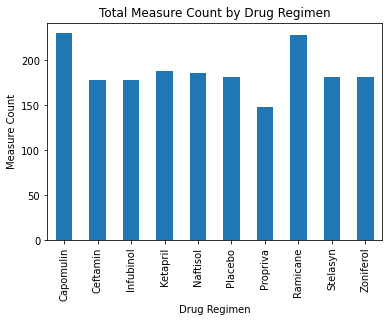

In [34]:
# Create a bar plot using pandas
regimen_count_bar = regimen_measure_count.plot(kind='bar')

# Label y axis and add title
regimen_count_bar.set_ylabel("Measure Count")
regimen_count_bar.set_title("Total Measure Count by Drug Regimen")

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
